In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.6%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



119.3%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



## 初始化参数 

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad = True)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad = True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad = True)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad = True))

params = [W1, b1, W2, b2]

## 实现激活函数

In [7]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(a,X)

## 实现模型

In [5]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X @ W1 + b1)
    return H @ W2 + b2

loss = nn.CrossEntropyLoss()

## MLP的训练过程与softmax回归的训练过程完全相同

AssertionError: 7.281810659790039

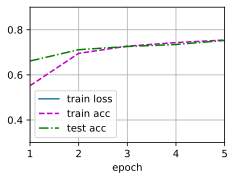

In [10]:
num_epochs = 5
lr = 0.01
updater = torch.optim.SGD(params, lr = lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

In [ ]:
d2l.predict_ch3(net, test_iter)

# 下面是另一种方法

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn

# M是样本数量，input_size是输入层大小
# hidden_size是隐含层大小，output_size是输出层大小
M, input_size, hidden_size, output_size = 64, 1000, 100, 10

# 生成随机数当作样本，同时用Variable 来包装这些数据，设置 requires_grad=False 表示在方向传播的时候，
# 我们不需要求这几个 Variable 的导数
x = Variable(torch.randn(M, input_size))
y = Variable(torch.randn(M, output_size))

# 使用 nn 包的 Sequential 来快速构建模型，Sequential可以看成一个组件的容器。
# 它涵盖神经网络中的很多层，并将这些层组合在一起构成一个模型.
# 之后，我们输入的数据会按照这个Sequential的流程进行数据的传输，最后一层就是输出层。
# 默认会帮我们进行参数初始化
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
)

# 定义损失函数
loss_fn = nn.MSELoss(reduction='sum')

## 设置超参数 ##
learning_rate = 1e-4
EPOCH = 300

# 使用optim包来定义优化算法，可以自动的帮我们对模型的参数进行梯度更新。这里我们使用的是随机梯度下降法。
# 第一个传入的参数是告诉优化器，我们需要进行梯度更新的Variable 是哪些，
# 第二个参数就是学习速率了。
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


## 开始训练 ##
for t in range(EPOCH):    
    # 向前传播
    y_pred= model(x)
    # 计算损失
    loss = loss_fn(y_pred, y)
    # 显示损失
    if (t+1) % 50 == 0:
        print(loss.data)
    # 在我们进行梯度更新之前，先使用optimier对象提供的清除已经积累的梯度。
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新梯度
    optimizer.step()

tensor(36.8211)
tensor(2.3133)
tensor(0.2287)
tensor(0.0305)
tensor(0.0050)
tensor(0.0009)


## 定制一个nn模块

In [3]:
import torch
from torch.autograd import Variable

# 一定要继承 nn.Module
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
            我们在构建模型的时候，能够使用nn.Sequential的地方，尽量使用它，因为这样可以让结构更加清晰
        """
        super(TwoLayerNet, self).__init__()
        self.twolayernet = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        """
        在forward函数中，我们会接受一个Variable，然后我们也会返回一个Varible
        """
        y_pred = self.twolayernet(x)
        return y_pred

    
# M是样本数量，input_size是输入层大小
# hidden_size是隐含层大小，output_size是输出层大小
M, input_size, hidden_size, output_size = 64, 1000, 100, 10

# 生成随机数当作样本，同时用Variable 来包装这些数据，设置 requires_grad=False 表示在方向传播的时候，
# 我们不需要求这几个 Variable 的导数
x = Variable(torch.randn(M, input_size))
y = Variable(torch.randn(M, output_size))


model = TwoLayerNet(input_size, hidden_size, output_size)

# 定义损失函数
loss_fn = nn.MSELoss(reduction='sum')

## 设置超参数 ##
learning_rate = 1e-4
EPOCH = 300

# 使用optim包来定义优化算法，可以自动的帮我们对模型的参数进行梯度更新。这里我们使用的是随机梯度下降法。
# 第一个传入的参数是告诉优化器，我们需要进行梯度更新的Variable 是哪些，
# 第二个参数就是学习速率了。
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 开始训练 ##
for t in range(EPOCH):    
    # 向前传播
    y_pred= model(x)
    # 计算损失
    loss = loss_fn(y_pred, y)
    # 显示损失
    if (t+1) % 50 == 0:
        print(loss.data)
    # 在我们进行梯度更新之前，先使用optimier对象提供的清除已经积累的梯度。
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新梯度
    optimizer.step()

tensor(36.1613)
tensor(2.4845)
tensor(0.2966)
tensor(0.0478)
tensor(0.0092)
tensor(0.0019)


## 接着带上L2范式正则化

In [5]:
import torch
from torch.autograd import Variable

# 一定要继承 nn.Module
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        """
            我们在构建模型的时候，能够使用nn.Sequential的地方，尽量使用它，因为这样可以让结构更加清晰
        """
        super(TwoLayerNet, self).__init__()
        self.twolayernet = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        """
        在forward函数中，我们会接受一个Variable，然后我们也会返回一个Varible
        """
        y_pred = self.twolayernet(x)
        return y_pred

# 十分简单的L2正则项,添加到loss函数中去的方法
def L2_Regularization(model, l2_alpha):
    l2_loss = []
    for module in model.modules():
        if type(module) is nn.Linear:  #这里的type是根据自己需要可以进行修改的
            l2_loss.append((module.weight ** 2).sum() / 2.0)
    return l2_alpha * sum(l2_loss)
    
# M是样本数量，input_size是输入层大小
# hidden_size是隐含层大小，output_size是输出层大小
M, input_size, hidden_size, output_size = 64, 1000, 100, 10

# 生成随机数当作样本，同时用Variable 来包装这些数据，设置 requires_grad=False 表示在方向传播的时候，
# 我们不需要求这几个 Variable 的导数
x = Variable(torch.randn(M, input_size))
y = Variable(torch.randn(M, output_size))


model = TwoLayerNet(input_size, hidden_size, output_size)

# 定义损失函数
loss_fn = nn.MSELoss(reduction='sum')

## 设置超参数 ##
learning_rate = 1e-4
EPOCH = 300
lambd = 1e-3  # L2正则化项系数

# 使用optim包来定义优化算法，可以自动的帮我们对模型的参数进行梯度更新。这里我们使用的是随机梯度下降法。
# 第一个传入的参数是告诉优化器，我们需要进行梯度更新的Variable 是哪些，
# 第二个参数就是学习速率了。
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## 开始训练 ##
for t in range(EPOCH):    
    # 向前传播
    y_pred= model(x)
    # 计算损失
    loss = loss_fn(y_pred, y) + L2_Regularization(model, lambd)
    # 显示损失
    if (t+1) % 50 == 0:
        print(loss.data)
    # 在我们进行梯度更新之前，先使用optimier对象提供的清除已经积累的梯度。
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 更新梯度
    optimizer.step()

tensor(36.2624)
tensor(2.5962)
tensor(0.3290)
tensor(0.0695)
tensor(0.0303)
tensor(0.0232)
